#### Importing Necessary Libraries

In [1490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [1491]:
df=pd.read_csv("clean_data.csv")
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [1492]:
# For creating Mental_support feature column; benefits, care_options, wellness_program, seek_help, anonymity
def support(row):
    count=0
    # benefits
    if row["benefits"]=="Yes":
        count+=1
    elif row["benefits"]=="Don't know":
        count+=0.5
    
    # care_options
    if row['care_options']=='Yes':
        count+=1
    elif row['care_options']=='Not sure':
        count=0.5
    
    # wellness_program
    if row["wellness_program"]=='Yes':
        count+=1
    elif row["wellness_program"]=="Don't know":
        count+=0.5

    # seek_help
    if row["seek_help"]=='Yes':
        count+=1
    elif row["seek_help"]=="Don't know":
        count+=0.5
    
    # anonymity
    if row["anonymity"]=='Yes':
        count+=1
    elif row["anonymity"]=="Don't know":
        count+=0.5

    return count

In [1493]:
df["support"]=df.apply(support,axis=1)
df.drop(['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,support
0,37,female,United States,No,Yes,Often,6-25,No,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2.5
1,44,male,United States,No,No,Rarely,More than 1000,No,No,Don't know,Maybe,No,No,No,No,No,Don't know,No,2.0
2,32,male,Canada,No,No,Rarely,6-25,No,Yes,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0.5
3,31,male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1.0
4,31,male,United States,No,No,Never,100-500,Yes,Yes,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2.5


In [1494]:
# For creating openness feature I will use; coworkers, supervisor, mental_health_interview

def openness(row):
    count=0
    # coworkers
    if row['coworkers']=='Yes':
        count+=1
    elif row['coworkers']=='Some of them':
        count+=0.5
    
    # supervisor
    if row['supervisor']=='Yes':
        count+=1
    elif row['supervisor']=='Some of them':
        count+=0.5
    
    return count

In [1495]:
df["openness"]=df.apply(openness,axis=1)
df.drop(['coworkers','supervisor'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,support,openness
0,37,female,United States,No,Yes,Often,6-25,No,Yes,Somewhat easy,No,No,No,Maybe,Yes,No,2.5,1.5
1,44,male,United States,No,No,Rarely,More than 1000,No,No,Don't know,Maybe,No,No,No,Don't know,No,2.0,0.0
2,32,male,Canada,No,No,Rarely,6-25,No,Yes,Somewhat difficult,No,No,Yes,Yes,No,No,0.5,2.0
3,31,male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,Somewhat difficult,Yes,Yes,Maybe,Maybe,No,Yes,1.0,0.5
4,31,male,United States,No,No,Never,100-500,Yes,Yes,Don't know,No,No,Yes,Yes,Don't know,No,2.5,1.5


In [1496]:
# For creating experience feature I will use; family_history, work_interfere, mental_health_consequence, obs_consequences columns

def experience(row):

    count=0

    # family history
    if row['family_history']=='Yes':
        count+=1

    # work_interfere
    if row['work_interfere']=='Often':
        count+=1.5
    elif row['work_interfere']=='Rarely':
        count+=1
    elif row['work_interfere']=='Sometimes':
        count+=0.5
    
    # mental_health_consequence
    if row['mental_health_consequence']=='Yes':
        count+=1
    elif row['mental_health_consequence']=='Maybe':
        count+=0.5

    # obs_consequence
    if row['obs_consequence']=='Yes':
        count+=1
    
    return count

In [1497]:
df["experience"]=df.apply(experience,axis=1)
df.drop(['family_history','work_interfere','mental_health_consequence','obs_consequence'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,treatment,no_employees,remote_work,tech_company,leave,phys_health_consequence,mental_health_interview,phys_health_interview,mental_vs_physical,support,openness,experience
0,37,female,United States,Yes,6-25,No,Yes,Somewhat easy,No,No,Maybe,Yes,2.5,1.5,1.5
1,44,male,United States,No,More than 1000,No,No,Don't know,No,No,No,Don't know,2.0,0.0,1.5
2,32,male,Canada,No,6-25,No,Yes,Somewhat difficult,No,Yes,Yes,No,0.5,2.0,1.0
3,31,male,United Kingdom,Yes,26-100,No,Yes,Somewhat difficult,Yes,Maybe,Maybe,No,1.0,0.5,4.5
4,31,male,United States,No,100-500,Yes,Yes,Don't know,No,Yes,Yes,Don't know,2.5,1.5,0.0


In [1498]:
X=df[["support","openness","experience"]]
X.head()

,support,openness,experience
0,2.5,1.5,1.5
1,2.0,0.0,1.5
2,0.5,2.0,1.0
3,1.0,0.5,4.5
4,2.5,1.5,0.0


In [1499]:
X.to_csv("unsupervised_learning.csv",index=False)

In [1500]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

PCA to reduce number of features

In [1501]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

K MEANS 

K Means k=2, silhouette = 0.271


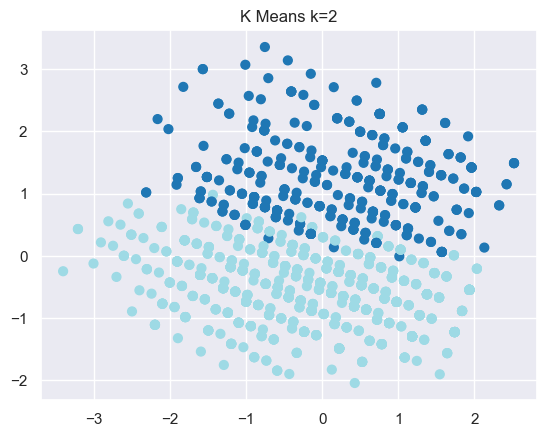

K Means k=3, silhouette = 0.307


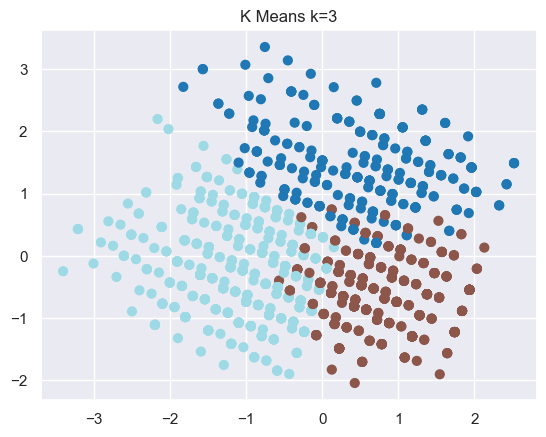

K Means k=4, silhouette = 0.306


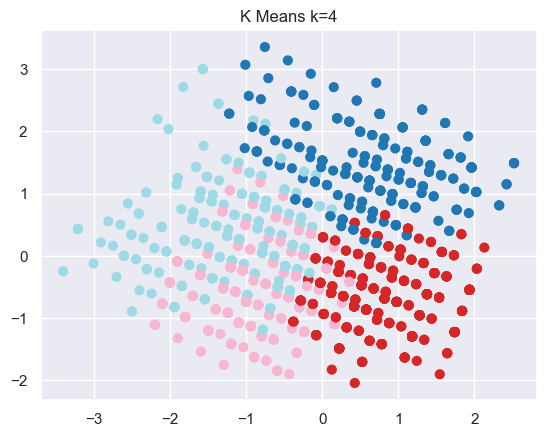

K Means k=5, silhouette = 0.298


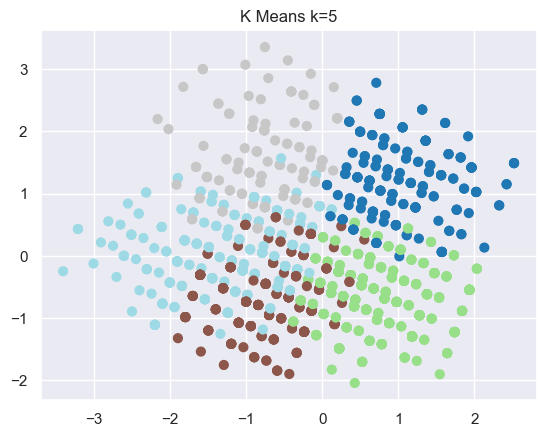

✅Best K Means: k=3, silhouette=0.307


In [1502]:
best_k=None
best_score_k=-1
sil_score_k=[]

for k in range(2, 6):
    km= KMeans(n_clusters=k,init='k-means++',random_state=42)
    labels= km.fit_predict(X_scaled)
    sil= silhouette_score(X_scaled, labels)
    sil_score_k.append(sil)
    print(f"K Means k={k}, silhouette = {sil:.3f}")
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', s=40)
    plt.title(f'K Means k={k}')
    plt.show()
    if sil > best_score_k:
        best_score_k, best_k = sil, k
print(f"✅Best K Means: k={best_k}, silhouette={best_score_k:.3f}")

AGGLOMERATIVE MEANS

Agglo Means Agg=2, silhouette = 0.213


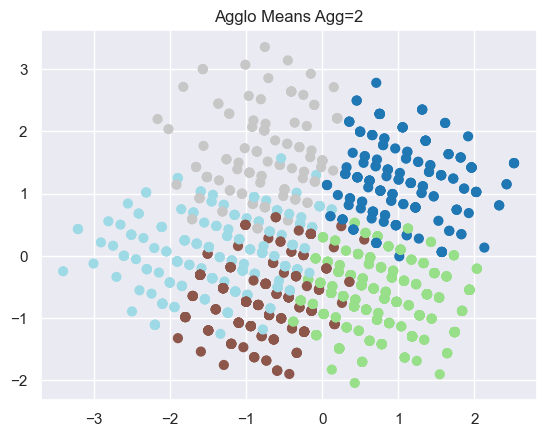

Agglo Means Agg=3, silhouette = 0.259


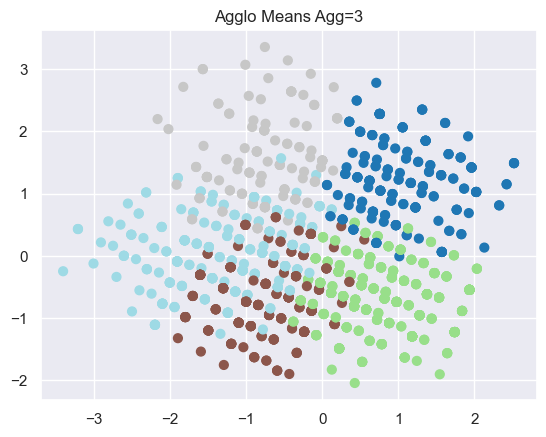

Agglo Means Agg=4, silhouette = 0.247


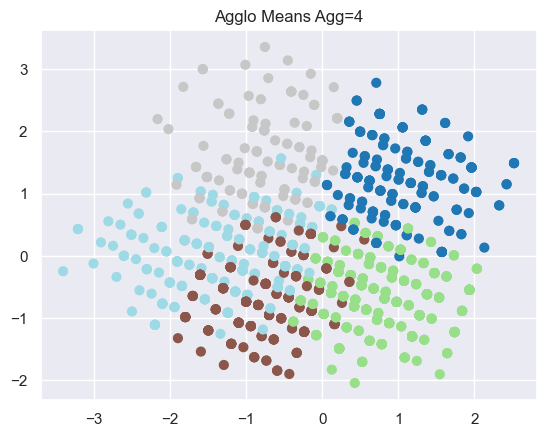

Agglo Means Agg=5, silhouette = 0.255


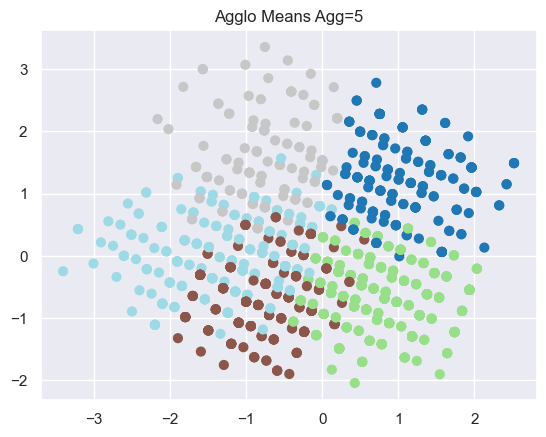

✅Best Agglo Means: Agglo means=3, silhouette=0.259


In [1503]:
best_agg=None
best_score_agg=-1
sil_score_agg=[]

for agglo in range(2,6):
    agg= AgglomerativeClustering(n_clusters=agglo, linkage='ward')
    labels_agg= agg.fit_predict(X_scaled)
    sil_agg= silhouette_score(X_scaled, labels_agg)
    sil_score_agg.append(sil_agg)
    print(f"Agglo Means Agg={agglo}, silhouette = {sil_agg:.3f}")
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', s=40)
    plt.title(f'Agglo Means Agg={agglo}')
    plt.show()
    if sil_agg > best_score_agg:
       best_score_agg, best_agg = sil_agg, agglo
print(f"✅Best Agglo Means: Agglo means={best_agg}, silhouette={best_score_agg:.3f}")

DBSCAN, silhouette = 0.365


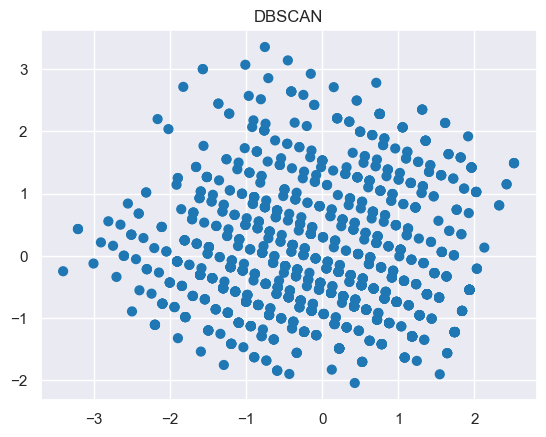

In [1504]:
sil_score_db=[]

range_db=np.arange(0.1,1.6,0.1)
for dbs in range_db:
    db = DBSCAN(eps=dbs, min_samples=5)
    labels_db = db.fit_predict(X_pca)

    if len(set(labels_db)) > 1:
      sil_db = silhouette_score(X_pca, labels_db)
    else:
      -1
    sil_score_db.append(sil_db)
  
print(f"DBSCAN, silhouette = {sil_db:.3f}")
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='tab10', s=40)
plt.title('DBSCAN')
plt.show()

In [1505]:
if sil_agg>sil:
    print("✅Agglomerative performed better.")
elif sil>sil_agg:
    print("✅K Means performed better.")
else:
    print("Scores are tied.")

✅K Means performed better.


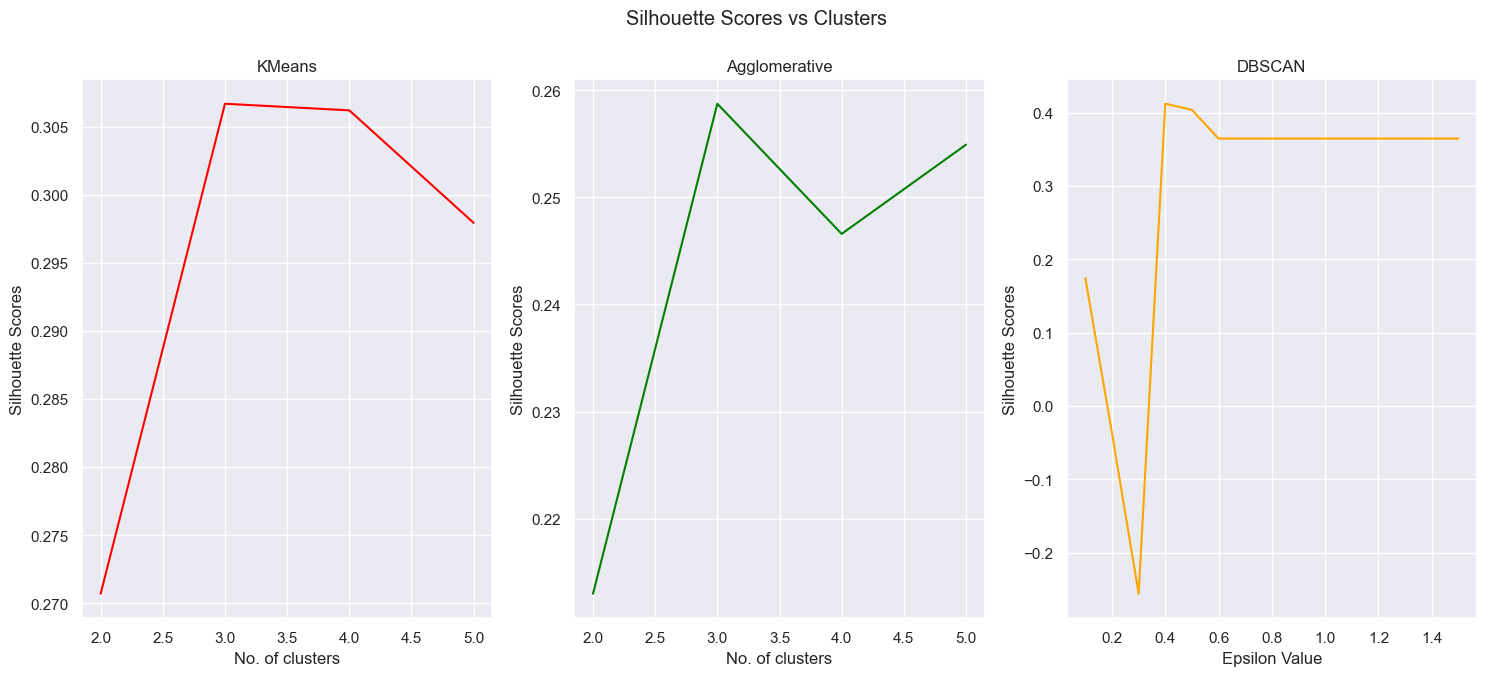

In [1506]:
plt.figure(figsize=(18,7))
plt.suptitle("Silhouette Scores vs Clusters")
plt.subplot(1,3,1)
sns.lineplot(x=range(2,6),y=sil_score_k,markers='o',color='red')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("KMeans")
plt.subplot(1,3,2)
sns.lineplot(x=range(2,6),y=sil_score_agg,markers='o',color='green')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("Agglomerative")
plt.subplot(1,3,3)
sns.lineplot(x=range_db,y=sil_score_db,markers='o',color='orange')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Scores')
plt.title("DBSCAN")

plt.show()

In [1507]:
km_clustering=KMeans(n_clusters=3,random_state=42)
# Creating clusters
km_labels=km_clustering.fit_predict(X_scaled)

In [1508]:
new_df=X
new_df["treatment"]=df["treatment"].map({"Yes":1,"No":0})
new_df["K Means"]=km_labels
new_df.groupby("K Means")[["support","openness","experience"]].describe()

support                                              openness  \
          count      mean       std  min  25%  50%  75%  max    count   
K Means                                                                 
0         283.0  4.022968  0.806887  2.5  3.5  4.0  5.0  5.0    283.0   
1         462.0  1.482684  0.653476  0.0  1.0  1.5  2.0  3.0    462.0   
2         505.0  1.552475  0.857228  0.0  1.0  1.5  2.0  4.0    505.0   

                   ...           experience                                \
             mean  ...  75%  max      count      mean       std  min  25%   
K Means            ...                                                      
0        1.293286  ...  1.5  2.0      283.0  1.621908  0.993854  0.0  1.0   
1        1.511905  ...  2.0  2.0      462.0  0.786797  0.778994  0.0  0.0   
2        0.451485  ...  0.5  2.0      505.0  1.952475  1.001348  0.0  1.0   

                        
         50%  75%  max  
K Means                 
0        1.5  2.5  4.5  
1        0.5  1.0  3.5  
2        2.0  2.5  4.5  

[3 rows x 24 columns]

### **Interpretation of Clusters**

#### **1. Cluster 0**
1. Support: Mean=4.02 [relatively high]
2. Openness: Mean=1.29 [very low]
3. Experience: Mean=1.62 [very low]

**This shows that Cluster 0 shows : High mental health support with low to medium openness and experience with mental health issues.**

#### **2. Cluster 1**
1. Support: Mean=1.48 [very low]
2. Openness: Mean=1.51 [modestly low]
3. Experience: Mean=0.69 [quite low]

**This shows that Cluster 1 shows : High openess to discuss there mental health issues but has low mental health support and experience.**

#### **3. Cluster 2**
1. Support: Mean=1.55 [low]
2. Openness: Mean=0.45 [extremely low]
3. Experience: Mean=1.95 [relatively high]

**This shows that Cluster 2 shows : Very low openness and experience indicating that they are unaware but they are provided with some facities for mental health.**